In [52]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [53]:
pd.set_option('display.max_columns', None)
unfiltered_data=pd.read_csv('../raw_data/cleaned_data_040321.csv',encoding='latin-1')

## Encoding

In [54]:
# Gender Encoding
ohe_sex = OneHotEncoder(sparse = False)
ohe_sex.fit(unfiltered_data[['Dem_gender']]) 


ohe_sex.categories_


unfiltered_data[['Female','Male','Other']]= ohe_sex.transform(unfiltered_data[['Dem_gender']])

unfiltered_data.drop(columns='Dem_gender',inplace=True)

##############  Dem_edu

unfiltered_data['Dem_edu'] = unfiltered_data['Dem_edu'].replace({'Uninformative response':0,'None':1,'Up to 6 years of school':2, 'Up to 9 years of school':3, 'Up to 12 years of school':4, 'Some College, short continuing education or equivalent':5, 'College degree, bachelor, master': 6, 'PhD/Doctorate':7 })

##############  Dem_edu_mom

unfiltered_data['Dem_edu_mom'].value_counts()

unfiltered_data['Dem_edu_mom'] = unfiltered_data['Dem_edu_mom'].replace({'Uninformative response':0,'None':1,'Up to 6 years of school':2, 'Up to 9 years of school':3, 'Up to 12 years of school':4, 'Some College or equivalent':5, 'College degree': 6, 'PhD/Doctorate':7 })

### Dem_riskgroup

unfiltered_data['Dem_riskgroup'] = unfiltered_data['Dem_riskgroup'].replace({'No':1,'Not sure':2, 'Yes':3})

## Dem_maritalstatus

ohe_marital = OneHotEncoder(sparse = False)
ohe_marital.fit(unfiltered_data[['Dem_maritalstatus']]) 
ohe_marital.categories_

unfiltered_data[['Divorced/widowed','Married/cohabiting','Other or would rather not say','Single','Uninformative response']]= ohe_marital.transform(unfiltered_data[['Dem_maritalstatus']])

unfiltered_data.drop(columns='Dem_maritalstatus',inplace=True)

##### Dem_Expat

unfiltered_data['Dem_Expat'] = unfiltered_data['Dem_Expat'].replace({'no':0,'yes':1})

##### Dem_isolation

ohe_isolation = OneHotEncoder(sparse = False)
ohe_isolation.fit(unfiltered_data[['Dem_isolation']]) 
ohe_isolation.categories_

unfiltered_data[['no opinion','Isolated','Isolated in medical facility of similar location','Life carries on as usual','Life carries on with minor changes']]= ohe_isolation.transform(unfiltered_data[['Dem_isolation']])

unfiltered_data.drop(columns='Dem_isolation',inplace=True)

## Dem_employement

ohe_employment = OneHotEncoder(sparse = False)
ohe_employment.fit(unfiltered_data[['Dem_employment']]) 
# ohe_employment.categories_

unfiltered_data[['Full time employed','Not employed','Part time employed','Retired','Self-employed','Student']]= ohe_employment.transform(unfiltered_data[['Dem_employment']])

unfiltered_data.drop(columns='Dem_employment',inplace=True)

In [55]:
unfiltered_data.columns

unfiltered_data.drop(columns=['Unnamed: 0','UserLanguage'],inplace=True)

new_df=unfiltered_data.drop(columns=['Country','Dem_isolation_adults','Dem_isolation_kids'])

# for i in new_df.columns:
#     print (i)

# SMALLER DF

In [56]:
# new_df = new_df.sample(45000)

In [57]:
# new_df.head()

# 3. Feature selection for PREDICTING "PSS10_avg"

In [58]:
X = new_df[['BFF_15_1','BFF_15_2','BFF_15_3','BFF_15_4','BFF_15_5','BFF_15_6','BFF_15_7','BFF_15_8','BFF_15_9','BFF_15_10','BFF_15_11',
           'BFF_15_12','BFF_15_13','BFF_15_14','BFF_15_15',
            "Dem_age","Dem_edu","Dem_riskgroup",'Female','Male','Other','Divorced/widowed',
            'Married/cohabiting','Other or would rather not say','Single','Uninformative response','no opinion','Isolated',
            'Isolated in medical facility of similar location','Life carries on as usual','Life carries on with minor changes',
            'Full time employed','Not employed','Part time employed','Retired','Self-employed']].reset_index(drop=True)
y = new_df["PSS10_avg"]

In [59]:
# provisional_removed=["Dem_age","Dem_edu","Dem_riskgroup",'Female','Male','Other','Divorced/widowed',
#             'Married/cohabiting','Other or would rather not say','Single','Uninformative response','no opinion','Isolated',
#             'Isolated in medical facility of similar location','Life carries on as usual','Life carries on with minor changes',
#             'Full time employed','Not employed','Part time employed','Retired','Self-employed']

In [60]:
# y to rounded/integers 

In [61]:
y

0        2.2
1        2.1
2        2.3
3        2.6
4        2.7
        ... 
85484    1.7
85485    1.7
85486    3.0
85487    1.4
85488    1.9
Name: PSS10_avg, Length: 85489, dtype: float64

In [62]:
# y = y.round()

In [63]:
# y = y.astype(int)

In [64]:
y

0        2.2
1        2.1
2        2.3
3        2.6
4        2.7
        ... 
85484    1.7
85485    1.7
85486    3.0
85487    1.4
85488    1.9
Name: PSS10_avg, Length: 85489, dtype: float64

In [65]:
X.shape

(85489, 36)

In [66]:
# plt.hist(X['BFF_15_1'])

In [67]:
# plt.hist(X_scaled[0])

# 4.1 Scaling as SCIKITLEARN sugest

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(X_train)
# X_scaled = scaler.transform(X_train)

In [70]:
# scaler.mean_

In [71]:
# scaler.scale_

In [72]:
# X_scaled

In [73]:
# X_scaled.mean(axis=0)

In [74]:
# X_scaled.std(axis=0)

# 4. Feature Scaling

In [75]:
from sklearn.preprocessing import MinMaxScaler

m_scaler = MinMaxScaler() # Instanciate Robust Scaler

m_scaler.fit(X) # Fit scaler to feature

X_scaled = m_scaler.transform(X) #Scale

X_scaled

array([[0.2, 0.2, 0.8, ..., 0. , 0. , 0. ],
       [0.6, 0.4, 0.6, ..., 0. , 1. , 0. ],
       [0.8, 0.6, 0.8, ..., 1. , 0. , 0. ],
       ...,
       [0.8, 0.8, 0.4, ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0.6, 0.6, 0.4, ..., 0. , 0. , 0. ]])

In [76]:
X_scaled = pd.DataFrame(data=X_scaled)

In [77]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.2,0.2,0.8,0.8,0.8,0.2,0.8,1.0,0.8,0.2,0.6,1.0,0.8,0.2,0.8,0.021739,0.857143,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.6,0.4,0.6,0.6,0.6,0.6,0.6,0.8,0.6,0.4,0.6,0.6,0.6,0.6,0.6,0.543478,0.857143,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.8,0.6,0.8,0.8,0.6,0.8,0.8,0.8,0.8,0.4,0.8,0.8,0.8,0.4,0.8,0.119565,0.714286,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.6,0.8,0.6,0.6,0.8,0.6,0.6,0.8,0.2,0.2,0.8,0.8,0.6,0.8,0.217391,0.571429,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.8,0.2,0.8,0.6,0.6,0.6,0.8,0.8,0.8,0.2,0.4,1.0,1.0,0.0,1.0,0.141304,0.857143,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [78]:
# new_df.columns

In [79]:
# X_scaled.columns = X.columns

In [80]:
# X_scaled.head()

# ORDINAL LOGISTIC REGRESSION

In [81]:
# pip install mord

In [82]:
# choose models
from sklearn.linear_model import LinearRegression, LogisticRegression
from mord import LogisticAT

# instantiate models
model_linear = LinearRegression()
# model_1vR = LogisticRegression(max_iter=10000,
#                                multi_class='ovr',
#                                class_weight='balanced')
# model_multi = LogisticRegression(max_iter=10000,
#                                  multi_class='multinomial',
#                                  solver='lbfgs',
#                                  class_weight='balanced')
# model_ordinal = LogisticAT(alpha=0)  # alpha parameter set to zero to perform no regularisation

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
import numpy as np

In [84]:
# divide df into features matrix and target vector
features = X_train
target = y_train

In [85]:
target

47459    2.2
68060    2.8
38282    4.5
40598    2.7
13620    4.3
        ... 
6265     1.3
54886    2.4
76820    3.3
860      2.5
15795    2.2
Name: PSS10_avg, Length: 68391, dtype: float64

In [86]:
MAE = make_scorer(mean_absolute_error)
folds = 5

print('Mean absolute error:' )
MAE_linear = cross_val_score(model_linear,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Linear regression: ', np.mean(MAE_linear))
# MAE_1vR = cross_val_score(model_1vR,
#     features,
#     target,
#     cv=folds,
#     scoring=MAE)
# print('Logistic regression (one versus rest): ', np.mean(MAE_1vR))
# MAE_multi = cross_val_score(model_multi,
#     features,
#     target,
#     cv=folds,
#     scoring=MAE)
# print('Logistic regression (multinomial): ', np.mean(MAE_multi))
# MAE_ordinal = cross_val_score(model_ordinal,
#     features,
#     target,
#     cv=folds,
#     scoring=MAE)
# print('Ordered logistic regression: ', np.mean(MAE_ordinal))

Mean absolute error:
Linear regression:  0.47816313381527153


In [87]:
from sklearn.metrics import accuracy_score

def acc_fun(target_true, target_fit):
    target_fit = np.round(target_fit)
    target_fit.astype('int')
    return accuracy_score(target_true, target_fit)

acc = make_scorer(acc_fun)
folds = 5

print('Accuracy:' )
acc_linear = cross_val_score(model_linear,
    features,
    target,
    cv=folds,
    scoring=acc)
print('Linear regression: ', np.mean(acc_linear))
# acc_1vR = cross_val_score(model_1vR,
#     features,
#     target,
#     cv=folds,
#     scoring=acc)
# print('Logistic regression (one versus rest): ', np.mean(acc_1vR))
# acc_multi = cross_val_score(model_multi,
#     features,
#     target,
#     cv=folds,
#     scoring=acc)
# print('Logistic regression (multinomial): ', np.mean(acc_multi))
# acc_ordinal = cross_val_score(model_ordinal,
#     features,
#     target,
#     cv=folds,
#     scoring=acc)
# print('Ordered logistic regression: ', np.mean(acc_ordinal))

Accuracy:


/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "<ipython-input-87-ce59a1751aa1>", line 6, in acc_fun
    return accuracy_score(target_true, target_fit)
  File "/home/antonio/.p

Linear regression:  nan


/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "<ipython-input-87-ce59a1751aa1>", line 6, in acc_fun
    return accuracy_score(target_true, target_fit)
  File "/home/antonio/.p

# MODEL ORDINAL

In [88]:
# model_ordinal.fit(X_train,y_train)

In [89]:
# y_pred = model_ordinal.predict(X_test)

In [90]:
# y_true = y_test
# y_true

# Model Linear

In [91]:
model_linear.fit(X_train,y_train)

LinearRegression()

In [92]:
y_pred = model_linear.predict(X_test)

In [93]:
y_true = y_test
y_true

2259     2.6
25361    2.2
45925    1.2
79156    2.1
17179    3.9
        ... 
65339    2.4
58146    2.7
75392    3.4
8753     3.5
58224    2.9
Name: PSS10_avg, Length: 17098, dtype: float64

In [94]:
y_true.reset_index(drop=True,inplace=True)

In [95]:
df_compare = pd.DataFrame()
df_compare['y_pred'] = y_pred
df_compare['y_true'] = y_true
df_compare.head(50)

,y_pred,y_true
0,2.784833,2.6
1,2.753320,2.2
2,1.788643,1.2
3,1.920719,2.1
4,3.580407,3.9
5,2.853403,2.5
6,2.665176,3.6
7,2.430023,2.6
8,2.762535,2.7
9,2.464018,1.9


/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/utils/validat

/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/utils/validat

/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/utils/validat

/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/utils/validat

/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/utils/validat

/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/utils/validat

/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/utils/validat

/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/home/antonio/.pyenv/versions/3.8.6/envs/psycoviddash/lib/python3.8/site-packages/sklearn/utils/validat

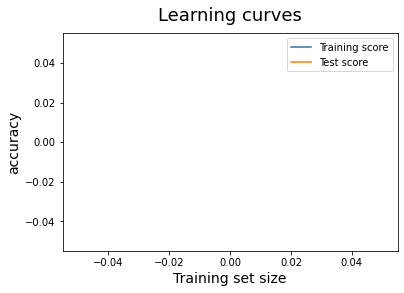

In [96]:
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import numpy as np
# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = model_linear,
                                                              X = X,
                                                              y = y,
                                                              train_sizes = [50,100,250,500,750,1000,1250],
                                                              cv = 10,
                                                              scoring = 'accuracy')
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

ValueError: continuous is not supported

# other

In [96]:
# df['Dem_age'].hist(bins=20)

<AxesSubplot:>

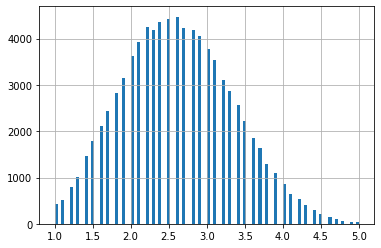

In [98]:
y.hist(bins=100)

In [122]:
names = ['Low', 'Medium', 'High']

# df_3['Stress_Level'] = pd.cut(df_3['PSS10_avg'], 3, labels=names)
y = pd.cut(y, 3, labels=names)

In [123]:
y

0           Low
1           Low
2           Low
3        Medium
4        Medium
          ...  
85484       Low
85485       Low
85486    Medium
85487       Low
85488       Low
Name: PSS10_avg, Length: 85489, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

# Hold Out

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Base Modelling

In [128]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score

# model = LogisticRegression(max_iter=1000,n_jobs=-1)

# scores = cross_val_score(model, X_train, y_train, cv=10)

# base_model_score = scores.mean()

# base_model_score

0.5945842271197981

In [118]:
# X_train.describe()

,BFF_15_1,BFF_15_2,BFF_15_3,BFF_15_4,BFF_15_5,BFF_15_6,BFF_15_7,BFF_15_8,BFF_15_9,BFF_15_10,BFF_15_11,BFF_15_12,BFF_15_13,BFF_15_14,BFF_15_15,Dem_age,Dem_edu,Dem_riskgroup,Female,Male,Other,Divorced/widowed,Married/cohabiting,Other or would rather not say,Single,Uninformative response,no opinion,Isolated,Isolated in medical facility of similar location,Life carries on as usual,Life carries on with minor changes,Full time employed,Not employed,Part time employed,Retired,Self-employed
count,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000
mean,3.834419,3.434939,4.288755,4.384779,4.050841,3.621314,4.374339,4.706531,4.420780,2.763867,4.350961,4.725876,4.460499,3.195803,4.751279,38.931438,5.510013,2.455052,0.720813,0.268956,0.010231,0.073729,0.544197,0.038637,0.343035,0.000402,0.000140,0.372855,0.001030,0.050841,0.575135,0.478918,0.087051,0.094244,0.069452,0.104527
std,1.399730,1.392446,1.165276,1.281975,1.397335,1.396412,1.114153,1.197252,1.255422,1.269772,1.123300,0.982803,1.146201,1.401359,0.943001,13.771971,1.060216,0.848660,0.448604,0.443421,0.100630,0.261332,0.498047,0.192729,0.474727,0.020035,0.011818,0.483568,0.032079,0.219674,0.494327,0.499560,0.281912,0.292170,0.254223,0.305946
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,2.000000,4.000000,28.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,3.000000,5.000000,37.000000,6.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,49.000000,6.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,92.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
# y_train

41485    3.0
1661     2.0
54661    3.0
33560    2.0
23257    2.0
        ... 
6265     1.0
54886    2.0
76820    3.0
860      2.0
15795    2.0
Name: PSS10_avg, Length: 57277, dtype: float64

# KNeighborsClassifier

In [235]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

# Instanciate the model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model on the scaled Training data
cv_results = cross_validate(knn_model, X_train,y_train)

base_knn_score = cv_results['test_score'].mean()

base_knn_score

# scores = cross_val_score(model, X_train, y_train, cv=10)

# base_model_score = scores.mean()

# base_model_score

0.45916666666666667

# Feature permutation in Sklearn

In [ ]:
# from sklearn.inspection import permutation_importance

# log_model = LogisticRegression(max_iter=1000).fit(X, y) # Fit model

# permutation_score = permutation_importance(log_model, X, y, n_repeats=100) # Perform Permutation

# importance_df = pd.DataFrame(np.vstack((X.columns,
#                                         permutation_score.importances_mean)).T) # Unstack results
# importance_df.columns=['feature','score decrease']

# importance_df.sort_values(by="score decrease", ascending = False) # Order by importance